# Stats 2550 Homework 8

# Hayden Copenhafer U1113702

In [1]:
#boilerplate
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format='svg'
from scipy import stats
import seaborn as sb
import statsmodels.api as sm

In [2]:
#get all the csv data in our code as lists:
#categorical variables have been replaced with 0s and 1s so that python can store in list format

idnum=[11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,12,12,12,12,12,12,12,13,14,14,14,14,14,14,14,14,15,15,15,
    15,16,16,16,16,16,16,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,19,19,19,20,20,22,23,23,23,23,23,23,23,25.1,
    25.1,25.1,25.1,25.1,26,26,26,26,26,27,27,27,28,28,28,28,28,29,29,29,29,29,29,29,29,29,29,30,30,30,30,30,30,30,30,32,32,
    32,32,32,32,32,32,32,33,33,35,35,35,35,35,35,36,36,36,36,37,38,39,39,39,40,40]
#divided by 10,000,000,000

duration=[7,7,3,1,1,1,1,3,5,3,1,1,3,1,1,1,1,1,1,1,7,7,7,5,3,1,1,5,7,3,5,3,3,1,3,3,7,7,3,3,7,7,7,3,3,7,5,3,5,1,1,1,1,1,7,10,
          3,3,1,1,1,1,1,1,7,7,3,5,3,3,7,7,5,7,7,7,7,7,7,7,5,1,7,7,3,1,1,3,7,3,7,7,3,3,3,7,5,1,1,1,1,1,1,1,1,7,3,1,7,1,1,1,
          1,7,10,7,5,7,1,3,1,1,7,3,5,5,7,5,1,1,7,3,3,3,7,7,7,5,1,1,1]

bids=[14,12,23,13,18,25,20,16,11,9,8,10,12,13,13,17,16,17,29,20,16,22,6,5,9,13,12,18,17,14,10,4,14,13,8,5,9,7,20,15,18,16,
      2,14,17,14,24,5,21,13,22,11,19,20,9,3,8,16,16,15,20,14,19,11,20,5,10,18,29,16,16,18,17,15,10,11,10,16,6,13,14,14,5,13,
      15,7,17,14,7,11,7,14,19,18,23,9,7,15,13,23,14,10,16,9,12,13,5,13,16,16,18,9,15,16,15,14,20,15,11,16,23,14,8,2,7,17,10,
      20,3,1,12,13,16,19,3,21,14,13,1,1,1]

price1=[10,30,0.99,1,1,1,0.01,0.99,19.99,25,1,1,0.01,0.99,1,1,0.01,1,1,1,5,0.99,24.99,35,0.01,0.01,0.01,9.99,15,0.99,9.99,
        34.99,0.99,0.99,20,15,17.99,25,0.99,0.99,9.99,0.99,55,0.99,0.99,0.99,0.99,35,0.99,0.01,0.01,10,0.01,0.01,10,30,
        9.99,0.99,0.01,0.01,0.01,0.01,0.01,9.99,15,1,0.99,19.99,0.99,0.99,0.99,18,0.99,12,0.99,9.99,0.99,9.99,24.99,10,
        10,0.99,30,0.99,0.99,0.99,0.99,0.99,0.99,0.99,29.95,16,12,0.99,0.99,0.01,25,1,1,1,1,1,1,1,1,1,0.99,1,0.99,1,1,1,1,
        0.99,9.99,1.99,0.01,9.99,1,0.99,0.99,0.99,19.99,51.99,0.99,0.99,0.99,0.99,69.95,64.95,0.99,0.99,0.99,0.99,38,0.99,
        9.95,0.99,64.95,54.99,64.95]

ship=[3.75,0,4,2.99,2.99,2.99,0,4,4,4,2.99,2.99,4,8.02,2.99,2.99,0,2.99,2.99,2.99,4,4,8.7,4,0,0,0,3.59,4,8.7,1.99,4,8.7,4,
      4,3.5,0,11.42,4,8.7,4,0,9.02,4,0,3,3.99,0,4,0,0,4,0,0,4,0,3.99,0,0,0,0,0,0,3.99,0,0,0,2.95,4,4,4,4,4,0,4,3,3.99,9.69,
      4,0,9.26,0,0,3.99,0,0,0,4,3,4,8.7,4,4,0,0,3,2.99,2.99,2.99,2.99,2.99,2.99,2.99,2.99,2.99,4.9,0,2.99,2.95,2.99,2.99,
      2.99,2.99,3.5,6,0,0,4,0,3.5,0,4,4,0,4,10.35,4,4,0,0,4,0,4,4,4,3,3.99,4,0,11.45,0]

price2=[45.75,61.76,40.1,53.99,50.5,57.5,39.51,47,51,47,54.99,59.88,46.5,49,54.51,55.99,31.06,56,51.99,52.59,49.01,46,40.7,
        49.91,46,37.02,30,38.1,44,47.7,35.99,48,46.71,40,50,34.5,52,48.92,51.55,44.78,45.99,46,65.02,64,40.1,40,49.49,42.55,
        38,45,63.5,43,61,71,44,31,41.99,36,56,56.01,56,62.89,55,54.49,39,52.5,41,41.95,47,47,36,47,55,46,40.06,37,34.99,
        49.75,43.33,43,38.26,32,46.03,37.04,55.6,31,28.98,45,36,46,54.7,44,45.21,44,46,33.01,48,54.99,48.99,53.99,53.76,
        55.99,53.98,63.99,53.99,38.76,36,48,43.95,53.76,58.98,58,53.99,41.5,43.36,31,46,47,41,45.5,49,46,50,51.99,42,41.35,
        40.05,39,75,64.95,64.5,42.25,43,45,47,38.06,36.99,41.99,64.95,66.44,64.95]

condition=[1,1,0,0,0,0,1,1,1,0,0,0,1,1,0,0,1,0,0,0,1,1,1,0,0,1,1,1,1,0,1,1,0,1,1,1,1,1,0,1,0,1,1,0,1,1,1,1,1,0,0,1,0,0,1,1,
           1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,
           0,0,1,1,0,0,1,0,1,1,1,0,1,1,1,1,0,0,1,1,1,0,1,1,1,1,0,0,0]
#new is 0, used is 1

reviews=[0,27,270144,4858,4858,4858,7284,1270,36,627,4858,4858,172,350,4858,4858,7284,4858,4858,4858,285,309,3085,127,1144,
         7284,7284,861,2131,251,19,85,251,4200,63,37,121,11,1580,88,1154,90,25,127,2046,88,27,10,14504,556,820,18,820,820,
         103,19,69,2046,820,820,820,820,820,69,422,116,42241,194,27,231,355,389,261,15,4473,297,462,94,154,21,35,206,555,
         365,54,4982,4982,270144,0,299,208,37,64,7,7,381,239,4858,4858,4858,4858,4858,4858,4858,4858,41,15,4858,943,4858,
         4858,4858,4858,998,2399,166,8224,62,30,998,280,34,201,223861,14503,14503,877,14503,118345,118345,991,42241,270143,
         270144,508,8625,2290,16041,118345,118345,118345]

photo=[1,1,1,1,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,0,1,0,1,0,1,1,0,0,1,1,1,1,0,1,1,0,1,1,1,1,0,0,1,0,1,1,1,0,1,1,1,1,1,0,0,1,0,
       1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,
       1,1,0,0,1,0,0,1,0,1,1,1,1,1,0,0,1,1,0,1,0,1,1,1,1]
#stock is 1, real is 0

wheels=[1,2,0,2,2,2,0,0,2,1,2,2,1,2,2,2,0,2,2,2,2,0,1,1,1,0,0,0,1,1,0,1,1,0,2,0,2,1,1,1,1,1,4,2,1,1,2,1,0,1,2,0,2,2,2,0,1,1,
        2,2,2,2,2,2,0,2,1,0,1,0,0,1,2,1,1,0,1,0,1,1,1,0,1,1,2,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,0,0,2,0,2,2,2,2,1,1,0,
        1,1,1,1,2,2,1,0,0,1,1,0,3,2,3,1,0,0,1,0,0,1,2,2,2]

## B1)

### a)

In [3]:
reg1=stats.linregress(duration, price2)
print('b0:',reg1.intercept,'b1:',reg1.slope)

b0: 52.37358377046455 b1: -1.317155598554823


The slope intercept form of our linear model is:
$$
Y=52.37-1.317X
$$

Where Y is total price and x is duration.

### b)

In [4]:
print('R squared:',reg1.rvalue**2)

R squared: 0.13999373335010165


Our $R^2$ value is rather low at 0.14 which means that listing duration and total price are not strongly correlated.

### c)

C:\Users\hayde\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


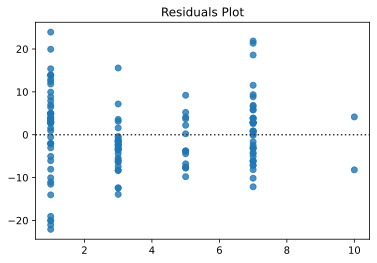

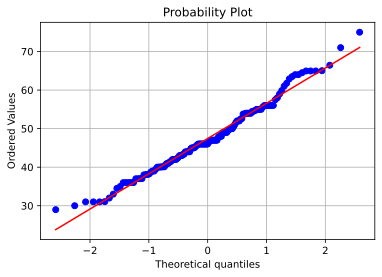

In [5]:
sb.residplot(duration,price2,data=())
plt.title('Residuals Plot')
plt.show()
probplot1=stats.probplot(price2,plot=plt)
plt.grid()

Our data meets the qualifications for the residuals. Our response variable is nearly linear when graphed on a probability plot and our residuals plot seems normally distributed and follows constant variability as it does not diverge or converge in a fan shape.

## B2)

### a)

In [6]:
#I am choosing to check for dependancy of listing duration, listing ID, bids, and controllers on starting price.
x=[duration,idnum,bids,wheels] #dependant data
y=price1 #independant data

def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.OLS(y, X).fit()
    return results

print(reg_m(y, x).summary())

#code adapted from u/Akavall https://stackoverflow.com/questions/11479064/multiple-linear-regression-in-python

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     27.15
Date:                Wed, 17 Jul 2024   Prob (F-statistic):           1.45e-16
Time:                        18:00:39   Log-Likelihood:                -541.52
No. Observations:                 141   AIC:                             1093.
Df Residuals:                     136   BIC:                             1108.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.8855      1.219      2.367      0.0

When we set starting price as the independant variable and perform OLS regression on listing duration, listing ID, number of bids, and number of controller steering wheels, we find that $R^2=$0.444 and the adjusted $R^2=$0.428.

The slope-intercept equations for the regression lines for duration, ID, bids, and wheels, respectively are:
$$
Y=2.89x+21.89
$$
$$
Y=-1.59x+21.89
$$
$$
Y=0.12x+21.89
$$
$$
Y=0.6x+21.89
$$

### b)

If I were to remove one regressor from the data pool I would eliminate the listing ID number. I would not expect this variable to have correlation with any other variables in the dataset because it is a serial number which does is used to catalog the listing rather than revealing any actual information about the listing itself.

### c)

In [7]:
x=[duration,bids,wheels]
y=price1

def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.OLS(y, X).fit()
    return results

print(reg_m(y, x).summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     35.78
Date:                Wed, 17 Jul 2024   Prob (F-statistic):           3.85e-17
Time:                        18:00:39   Log-Likelihood:                -542.10
No. Observations:                 141   AIC:                             1092.
Df Residuals:                     137   BIC:                             1104.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.8456      1.219      2.334      0.0

When we remove the ID number, our $R^2$ value actually drops slightly from 0.444 to 0.439 while the adjusted $R^2$ remains roughly the same. The value drops because we now have more degrees of freedom by removing a dependant variable.

### d)

The adjusted $R^2$ dropped marginally from 0.428 to 0.427. This value changed in the way it did because we now have more degrees of freedom by removing a variable.

## B3)

### a)

In [16]:
#code adapted from: https://www.geeksforgeeks.org/stepwise-regression-in-python/

from sklearn import linear_model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector

data=np.array([idnum,duration,bids,price1,ship,price2,condition,photo,reviews,wheels]) #put all of our lists into 1 array
df= pd.DataFrame(data) #store as dataframe
X=df.iloc[:,:-1] #Select features and target from dataframe. Indexes to last value of each list in array
y=df.iloc[:,-1]

#routine for stepwise regression:
sfs=SequentialFeatureSelector(linear_model.LogisticRegression(),
                                k_features=10,
                                forward=True,
                                scoring='accuracy',
                                cv=None)
selected_features = sfs.fit(X, y)

# Create a dataframe with only the selected features
selected_columns = [0,1,2,3,4,5,6,7,8,9]
df_selected = df[selected_columns]
 
# Split the data into train and test sets
X_train, X_test,\
    y_train, y_test = train_test_split(
        df_selected, y,
        test_size=0.3,
        random_state=42)
 
# Fit a logistic regression model using the selected features
logreg = linear_model.LogisticRegression()
logreg.fit(X_train, y_train)
 
# Make predictions using the test set
y_pred = logreg.predict(X_test)
 
# Evaluate the model performance
print(y_pred)

ValueError: Unknown label type: 'continuous'

### b)

Out of the regression models tested, I feel the results from B2 were the best. The multilinear regression in B2 was the most simple way to get the highest $R^2$ value and therefore gave the best model of the data while also being relatively simple in terms of coding demand. The main issue with the method from B2 is that it excluded the categorical variables which could have been important to the big picture.